### Author: Celine Combet
### Date Created: 5 Oct 2018
## This example jupyer notebook uses clmm code to generate mock data with a set of configuration parmeters, producing a catalog of ideal and noisy example data.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

### Import mock data module and setup the configuration 

In [2]:
import clmm.mock_data as mock

### Mock data generation requires a config dictionary

In [3]:
config={}
config['cluster_m'] = 1.e15
config['cluster_z'] = 0.3
config['src_z'] = 0.8
config['concentration'] = 4
config['cosmo'] = 'WMAP7-ML'
config['ngals'] = 10000
config['mdef'] = '200c'

ideal_data = mock.MockData(config=config)
noisy_data = mock.MockData(config=config)
noisy_data_z = mock.MockData(config=config)

### Generate the mock catalog from the configuration. Consider 3 examples of increasing complexity:
* Ideal data, no noise, all galaxies at the same redshift
* Noisy data, including shape noise and redshift error, all galaxies at the same redshift
* Noisy data, galaxies following redshift distribution, redshift error, shape noise

In [4]:
ideal_data.generate()
noisy_data.generate(is_shapenoise=True, shapenoise=0.005, is_zerr=True)
noisy_data_z.generate(is_shapenoise=True, is_zdistribution=True, is_zerr=True)


#### Ideal catalog first entries: no noise on the shape measurement, all galaxies at z=0.3

In [5]:
ideal_data.catalog[0:5]

id,ra,dec,gamma1,gamma2,z
int64,float64,float64,float64,float64,float64
0,-0.352411738251,0.343889548001,-8.66255884861e-05,-0.00353832004624,0.8
1,0.264459250493,0.0915260687199,-0.00631104092419,0.00496276994389,0.8
2,-0.0304992422297,0.351405403389,0.00570043830812,-0.000997017390008,0.8
3,0.272485886408,0.278580322018,0.000110758362651,0.00500683982067,0.8
4,-0.351084779076,0.34520643353,-5.97620650139e-05,-0.00353916204532,0.8


#### More realistic catalog: noise has been added on the shape measurement, galaxies follow some photoz distribution, gaussian pdf for each photoz is also provided (along with corresponding bins)

In [6]:
noisy_data_z.catalog[0:2]

id,ra,dec,gamma1,gamma2,z,z_pdf [34],z_bins [34]
int64,float64,float64,float64,float64,float64,float64,float64
0,0.0312199185857,-0.149071752887,0.0222385121112,-0.009742060797,2.03354371317,0.011489630439 .. 0.0142478566251,1.53354371317 .. 2.52354371317
1,0.293631283764,0.025579645636,-0.00249465917144,0.000437967459643,2.6753903463,0.0535981673527 .. 0.0620592341436,2.1753903463 .. 3.1653903463


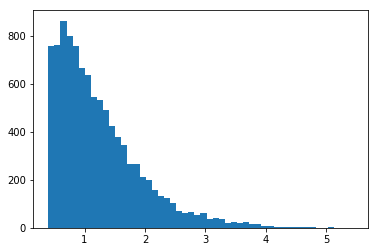

In [7]:
# Histogram of the redshift distribution of bkg galaxies (starting at z_cluster + 0.1)
hist = plt.hist(noisy_data_z.catalog['z'], bins=50)

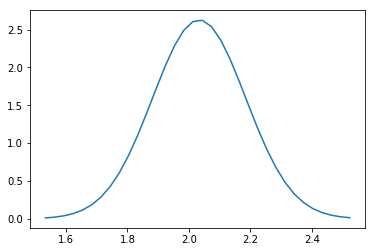

In [8]:
# pdz for the first galaxy in the catalog
plt.plot(noisy_data_z.catalog['z_bins'][0],noisy_data_z.catalog['z_pdf'][0])

### Compute and plot shear profile

In [9]:
from clmm import ShearAzimuthalAverager

In [10]:
cl_dict = {'z':config['cluster_z'], 'ra':0.0, 'dec': 0.0}

saa_ideal = ShearAzimuthalAverager(cl_dict,ideal_data.catalog)
saa_noisy = ShearAzimuthalAverager(cl_dict,noisy_data.catalog)
saa_noisy_z = ShearAzimuthalAverager(cl_dict,noisy_data_z.catalog)


saa_ideal.compute_shear()
saa_noisy.compute_shear()
saa_noisy_z.compute_shear()

saa_ideal.make_shear_profile()
saa_noisy.make_shear_profile()
saa_noisy_z.make_shear_profile()

/global/common/cori/software/python/3.6-anaconda-5.2/lib/python3.6/site-packages/astropy/table/row.py:65: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other


read g1, g2 directly
read g1, g2 directly
read g1, g2 directly


radius,ang_separation,g_t,g_x,g_t_err,g_x_err
Mpc,rad,,,,
float64,float64,float64,float64,float64,float64
0.88362214629,0.000961747991228,0.056837797453,2.02265075103e-19,0.0155562787027,7.33278108829e-18
1.11905835013,0.0012180003917,0.0462946442651,6.31246598203e-19,0.0122606672337,7.27654269432e-18
1.37667641963,0.00149839587737,0.0356829133889,-2.00746808499e-20,0.00999142125849,5.79247301255e-18
1.6280748581,0.00177202182055,0.0307806895675,-1.15956744545e-19,0.00921097996119,5.16796818877e-18
1.88004337508,0.00204626824598,0.0262463993341,3.09834503324e-19,0.00790644951748,5.17006512212e-18
2.12792048396,0.00231606151966,0.0230539209921,-3.28980969166e-20,0.00704983430551,3.42742683015e-18
2.37371965789,0.00258359313684,0.0200138870661,-2.448198454e-20,0.00727409652772,2.47863652688e-18
2.62833418257,0.00286071951793,0.0175313399938,-5.5957784199e-20,0.00685577567971,3.12548194257e-18


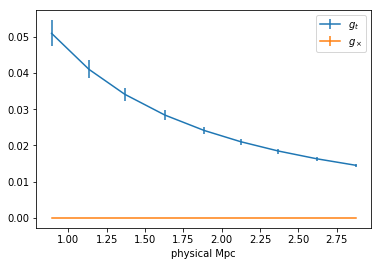

In [11]:
# Ideal data
saa_ideal.plot_profile()

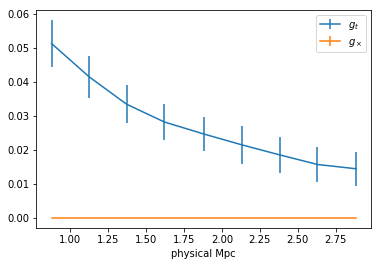

In [12]:
# Noisy data, all galaxies at the same redshift
saa_noisy.plot_profile()

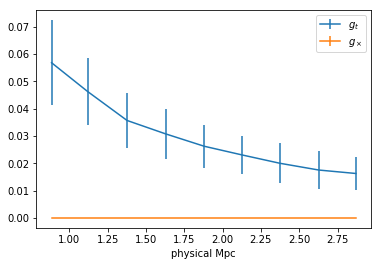

In [13]:
# Noisy data, galaxies following redshift distribution
saa_noisy_z.plot_profile()